### ASSIGNMENT 2 - INSTACART ANALYSIS

### By: Miguel Ruiz

### INST447-ESG1  

#### RESEARCH QUESTION

Do people order different foods at different times of the day?

#### OBTAINING DATA

The data set we will be analyzing for this assignment has been provided by Instacart, a grocery store delivery service.  Instacart allows customers to place their grocery orders online, have them gathered at the store, and then delivered to their home.

#### DATA INGESTION

We are given a CSV file which contains 20 store departments and corresponding information on the number of items ordered for those departments.  That information has been summarized for our convenience by Instacart.  I have loaded and stored the CSV file into a pandas dataframe called 'insta.'

Unit of Analysis:  a record of total items ordered per hour and per department

In [240]:
import pandas as pd
import numpy as np

In [241]:
insta = pd.read_csv('InstacartOrdersByDepartment-Spring2021.csv')
insta

,order_hour_of_day,department,num_orders_hour,tot_orders_dept
0,0,alcohol,53,5618
1,1,alcohol,32,5618
2,2,alcohol,5,5618
3,3,alcohol,3,5618
4,4,alcohol,2,5618
...,...,...,...,...
499,19,snacks,4959,118862
500,20,snacks,3397,118862
501,21,snacks,2782,118862
502,22,snacks,2216,118862


#### DATA CLEANING

The 'insta' data set itself is very clean.  There are no obvious misspellings, missing values, or mistakes in the data.  But we do have to remove the rows under the 'department' column that are not related to food.

#### DATA WRANGLING

Some department names like 'household' or 'babies' may very well contain orders related to food but the names are ambiguous enough for me to deem the columns as non-food related.  This is one assumption I have to make about the data set since we are not given detailed information on the specific orders.

I will divide up the 'insta' data set by the order hour number (0-23) and every relevant department for every hour in the day will be loaded into a dataframe called 'hours.'  Those dataframes will be stored into a list called 'orders' which will allow me to easily pull and merge the dataframes as I see fit.  I am using the 'department' column as my unique key and will use this column for merging purposes, if necessary.

In [206]:
orders = []
all_hours = range(24)
for num in all_hours:
    hours = insta[insta['order_hour_of_day'] == num].reset_index()
    hours = hours.drop([0,1,3,5,11,12,14,15,17,18])
    hours = hours.sort_values(by='department', ignore_index=True)
    hours = hours.drop('index', axis=1)
    hours.columns = ['order_hour_of_day', 'department', 'total_orders', 'total_dept_orders']
    col = hours.columns.tolist()
    col = ['department', 'order_hour_of_day', 'total_orders', 'total_dept_orders']
    hours = hours[col]
    orders.append(hours)

I concat each dataframe found in the 'orders' list and place them in a new dataframe called 'all_orders_long.'  Having the data organized in this manner will allow me to manipulate the dataframes in the manner I see fit to apply the appropriate visuals.  I can also apply filters and display specific departments with their corresponding hours and hourly orders.  I separated the department orders into a separate dataframe called 'all_dept_orders.'

In [207]:
all_dept_orders = orders[0][['department', 'total_dept_orders']]
all_dept_orders

all_orders_long = pd.concat([orders[0],orders[1],orders[2],orders[3],orders[4],orders[5],
                    orders[6],orders[7],orders[8],orders[9],orders[10],orders[11],
                    orders[12],orders[13],orders[14],orders[15],orders[16],orders[17],
                    orders[18],orders[19],orders[20],orders[21],orders[22],orders[23]])
all_orders_long.columns = ['department', 'hours', 'total orders', 'total_dept_orders']
all_orders_long = all_orders_long.drop('total_dept_orders', axis=1).reset_index()
all_orders_long = all_orders_long.drop('index', axis=1)
all_orders_long

,department,hours,total orders
0,bakery,0,307
1,breakfast,0,175
2,canned goods,0,324
3,dairy eggs,0,1331
4,deli,0,290
...,...,...,...
259,frozen,23,1267
260,meat seafood,23,386
261,pantry,23,1102
262,produce,23,5406


Below I present three visualizations of the 'all_orders_long' and 'all_dept_orders' dataframes.  After looking at histogram and scatterplot representations of the data, I decided that scatterplots displayed the information in the best manner.
The first graph depicts every order for every hour in the data.
The second graph depicts every order for each food-related department.
The final graph depicts total department orders for each food-related department.

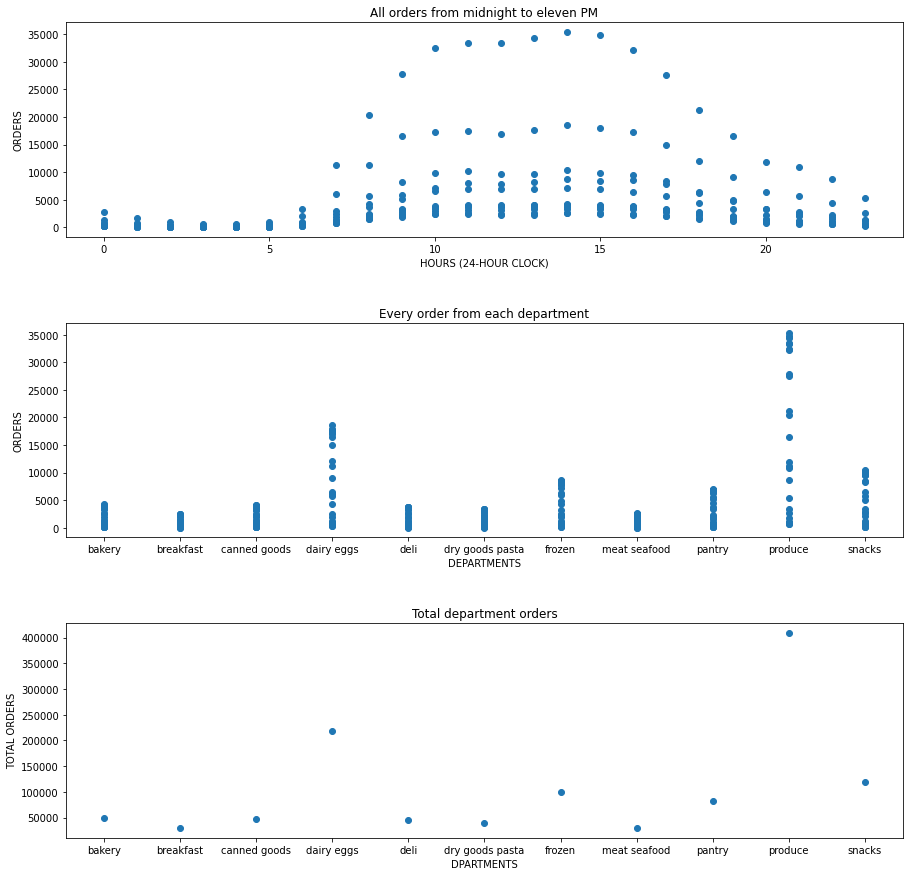

In [208]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4)

ax[0].scatter(all_orders_long['hours'], all_orders_long['total orders'])
ax[0].set_title("All orders from midnight to eleven PM")
ax[0].set_xlabel("HOURS (24-HOUR CLOCK)")
ax[0].set_ylabel("ORDERS")

ax[1].scatter(all_orders_long['department'], all_orders_long['total orders'])
ax[1].set_title("Every order from each department")
ax[1].set_xlabel("DEPARTMENTS")
ax[1].set_ylabel("ORDERS")

ax[2].scatter(all_dept_orders['department'], all_dept_orders['total_dept_orders'])
ax[2].set_title("Total department orders")
ax[2].set_xlabel("DPARTMENTS")
ax[2].set_ylabel("TOTAL ORDERS")

plt.show()

#### DATA ANALYSIS

Looking at the graph for all orders from midnight to 11PM, I decide to divide that data into three separate dataframes; one representing orders from midnight to 6AM, one representing orders from 7AM to 3PM, and the last one representing orders from 4PM to 11PM.

I chose those timeframes specifically because of the patterns occurring in the graph.  Orders between midnight and 6AM start us off with something that resembles a parabola and I wanted to examine that more closely.

Orders between 7AM and 3PM show us the beginning of a surge of orders and its peak and I felt that should have been examined separately.

Finally, the orders between 4PM and 11PM show us the steady but almost symmetrical decline and I felt that should be examined more closely.

While examining each graph, I took note on clusters of orders and their position on the graph and made determinations on a threshold value I would use to analyze total number of orders.  This will be explained in further detail below.

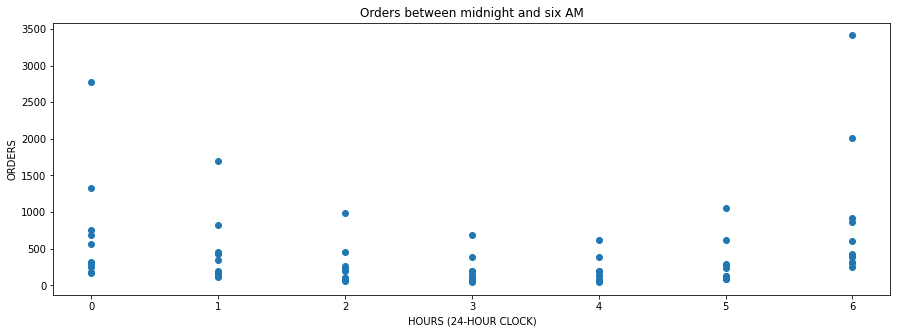

In [209]:
orders06_x = all_orders_long[all_orders_long['hours'].apply(lambda x: int(x)) < 7]['hours']
orders06_y = all_orders_long[all_orders_long['hours'].apply(lambda x: int(x)) < 7]['total orders']

plt.figure(figsize=(15, 5))
plt.scatter(orders06_x, orders06_y)
plt.title("Orders between midnight and six AM")
plt.xlabel("HOURS (24-HOUR CLOCK)")
plt.ylabel("ORDERS")
plt.show()

#### ORDERS BETWEEN MIDNIGHT AND 6AM

Threshold: 1000 orders or less

Examining the graph above, I take note of larger clusters of orders occurring below the 1000 order mark and so I use this value to examine and analyze total orders from each department taking 1000 orders or less and then those departments taking more than 1000 orders.  This method of analysis will be used for each time period below.

In [210]:
orders126_less1k = all_orders_long[(all_orders_long['total orders'].apply(lambda x: int(x)) <= 1000) &
                                   (all_orders_long['hours'].apply(lambda x: int(x)) < 7)]
orders126_less1k

display(all_orders_long[all_orders_long['hours'].apply(lambda x: int(x)) < 7].
       groupby('department')['total orders'].agg('sum').reset_index())
display(all_orders_long[all_orders_long['hours'].apply(lambda x: int(x)) < 7].
       groupby('hours')['total orders'].agg('sum').reset_index())

,department,total orders
0,bakery,1301
1,breakfast,870
2,canned goods,1282
3,dairy eggs,6017
4,deli,1241
5,dry goods pasta,1044
6,frozen,2907
7,meat seafood,814
8,pantry,2239
9,produce,11238


,hours,total orders
0,0,7664
1,1,4685
2,2,2686
3,3,2011
4,4,1958
5,5,3118
6,6,9896


I note some interesting observations.  At our present threshold, every department had received orders at every hour except for dairy eggs and produce.  The number of hours displayed below has been specially adjusted for this table alone; a department displaying '7' hours indicates there has been orders received for every hour in this period.

In [211]:
grouped_orders126_hours = orders126_less1k.groupby('department')['hours'].agg('count').reset_index()
grouped_orders126_hours

,department,hours
0,bakery,7
1,breakfast,7
2,canned goods,7
3,dairy eggs,5
4,deli,7
5,dry goods pasta,7
6,frozen,7
7,meat seafood,7
8,pantry,7
9,produce,3


Orders at our present threshold from the dairy eggs department were received at every hour except midnight and 6AM.

In [212]:
orders126_less1k[orders126_less1k['department'] == 'dairy eggs']

,department,hours,total orders
14,dairy eggs,1,827
25,dairy eggs,2,456
36,dairy eggs,3,391
47,dairy eggs,4,383
58,dairy eggs,5,617


Orders at our present threshold from the produce department were only received at 2, 3, and 4AM.

In [213]:
orders126_less1k[orders126_less1k['department'] == 'produce']

,department,hours,total orders
31,produce,2,985
42,produce,3,682
53,produce,4,622


Grouping by department and adding up all orders from every hour; meat seafood and breakfast departments had the least number of orders, snacks and frozen food had the most orders.

In [214]:
grouped_orders126_total = orders126_less1k.groupby('department')['total orders'].agg('sum').reset_index()
grouped_orders126_total

,department,total orders
0,bakery,1301
1,breakfast,870
2,canned goods,1282
3,dairy eggs,2674
4,deli,1241
5,dry goods pasta,1044
6,frozen,2907
7,meat seafood,814
8,pantry,2239
9,produce,2289


Threshold:  More than 1000 orders

All orders described below were recorded at greater than 1000.
Only two departments had received orders at this threshold; dairy eggs and produce, six records total

In [215]:
orders126_greater1k = all_orders_long[(all_orders_long['total orders'].apply(lambda x: int(x)) > 1000) &
                                      (all_orders_long['hours'].apply(lambda x: int(x)) < 7)]

orders126_greater1k

,department,hours,total orders
3,dairy eggs,0,1331
9,produce,0,2782
20,produce,1,1697
64,produce,5,1057
69,dairy eggs,6,2012
75,produce,6,3413


Orders at our present threshold from the dairy eggs department were only received at midnight and 6AM.

In [216]:
orders126_greater1k[orders126_greater1k['department']=='dairy eggs']

,department,hours,total orders
3,dairy eggs,0,1331
69,dairy eggs,6,2012


Orders at our present threshold from the produce department were received at every hour except 2, 3, and 4AM.

In [217]:
orders126_greater1k[orders126_greater1k['department']=='produce']

,department,hours,total orders
9,produce,0,2782
20,produce,1,1697
64,produce,5,1057
75,produce,6,3413


There were more than double the orders from the produce department compared to the dairy eggs department
during this time period.

In [218]:
grouped_orders126_greater1k_total = orders126_greater1k.groupby('department')['total orders'].agg('sum').reset_index()
grouped_orders126_greater1k_total

,department,total orders
0,dairy eggs,3343
1,produce,8949


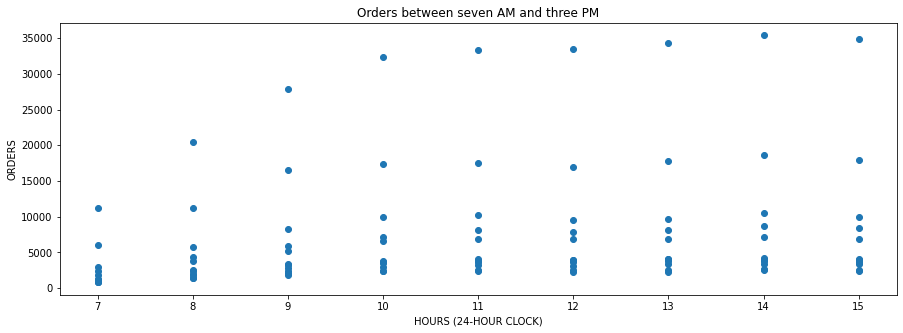

In [219]:
orders715_x = all_orders_long[(all_orders_long['hours'].apply(lambda x: int(x)) > 6) &
                              (all_orders_long['hours'].apply(lambda x: int(x)) < 16)]['hours']
orders715_y = all_orders_long[(all_orders_long['hours'].apply(lambda x: int(x)) > 6) &
                              (all_orders_long['hours'].apply(lambda x: int(x)) < 16)]['total orders']

plt.figure(figsize=(15,5))
plt.scatter(orders715_x, orders715_y)
plt.title("Orders between seven AM and three PM")
plt.xlabel("HOURS (24-HOUR CLOCK)")
plt.ylabel("ORDERS")
plt.show()

#### ORDERS BETWEEN 7AM AND 3PM

We begin to see a significant jump in total orders at each hour noting a larger cluster of orders recorded in the thousands eventually reaching tens of thousands of orders which is a fairly notable difference compared to the midnight-6AM graph.  Two departments in particular see a huge surge in orders beginning in this time period extending to the end of the day.  The orders peak at 2PM and begin their decline throughout the rest of the day.

Threshold:  10,000 orders or less

In [220]:
orders715_lesstenk = all_orders_long[(all_orders_long['total orders'].apply(lambda x: int(x)) <= 10000) &
                                     (all_orders_long['hours'].apply(lambda x: int(x)) > 6) &
                                     (all_orders_long['hours'].apply(lambda x: int(x)) < 16)]
orders715_lesstenk

display(all_orders_long[(all_orders_long['hours'].apply(lambda x: int(x)) > 6) &
                       (all_orders_long['hours'].apply(lambda x: int(x)) < 16)].
       groupby('department')['total orders'].agg('sum').reset_index())
display(all_orders_long[(all_orders_long['hours'].apply(lambda x: int(x)) > 6) &
                       (all_orders_long['hours'].apply(lambda x: int(x)) < 16)].
       groupby('hours')['total orders'].agg('sum').reset_index())

,department,total orders
0,bakery,31078
1,breakfast,18830
2,canned goods,30444
3,dairy eggs,140008
4,deli,27985
5,dry goods pasta,24408
6,frozen,61062
7,meat seafood,19322
8,pantry,52204
9,produce,263433


,hours,total orders
0,7,30666
1,8,57030
2,9,79596
3,10,92144
4,11,95814
5,12,94318
6,13,96940
7,14,100940
8,15,98018


At our present threshold, there are ZERO orders for produce.  Also, all departments except for snacks 
and dairy eggs are taking orders every hour.  The number of hours displayed below has been specially adjusted for this table alone; a department displaying '9' hours indicates there has been orders received for every hour in this period.

In [221]:
grouped_orders715_hours = orders715_lesstenk.groupby('department')['hours'].agg('count').reset_index()
grouped_orders715_hours

,department,hours
0,bakery,9
1,breakfast,9
2,canned goods,9
3,dairy eggs,1
4,deli,9
5,dry goods pasta,9
6,frozen,9
7,meat seafood,9
8,pantry,9
9,snacks,7


Orders for snacks at our present threshold have been received at every hour except for 11AM and 2PM.

In [222]:
orders715_lesstenk[orders715_lesstenk['department'] == 'snacks']

,department,hours,total orders
87,snacks,7,2922
98,snacks,8,5714
109,snacks,9,8270
120,snacks,10,9912
142,snacks,12,9600
153,snacks,13,9641
175,snacks,15,9909


Orders for dairy eggs at our present threshold have only been received at 7AM.

In [223]:
orders715_lesstenk[orders715_lesstenk['department'] == 'dairy eggs']

,department,hours,total orders
80,dairy eggs,7,6067


The frozen and snacks departments at our present threshold were receiving the most orders.
The dairy eggs and breakfast departments at our present threshold were receving the fewest orders.

In [224]:
grouped_orders715_orders = orders715_lesstenk.groupby('department')['total orders'].agg('sum').reset_index()
grouped_orders715_orders

,department,total orders
0,bakery,31078
1,breakfast,18830
2,canned goods,30444
3,dairy eggs,6067
4,deli,27985
5,dry goods pasta,24408
6,frozen,61062
7,meat seafood,19322
8,pantry,52204
9,snacks,55968


Threshold:  Orders greater than 10,000

We see only orders from three departments; produce, dairy eggs, and snacks.

In [225]:
orders715_greatertenk = all_orders_long[(all_orders_long['total orders'].apply(lambda x: int(x)) > 10000) & 
                                        (all_orders_long['hours'].apply(lambda x: int(x)) > 6) &
                                        (all_orders_long['hours'].apply(lambda x: int(x)) < 16)]
orders715_greatertenk

,department,hours,total orders
86,produce,7,11262
91,dairy eggs,8,11239
97,produce,8,20436
102,dairy eggs,9,16543
108,produce,9,27891
113,dairy eggs,10,17375
119,produce,10,32430
124,dairy eggs,11,17459
130,produce,11,33335
131,snacks,11,10242


At this threshhold of orders, we see orders from the dairy eggs department received at every hour except 7AM.

In [226]:
orders715_greatertenk[orders715_greatertenk['department'] == 'dairy eggs']

,department,hours,total orders
91,dairy eggs,8,11239
102,dairy eggs,9,16543
113,dairy eggs,10,17375
124,dairy eggs,11,17459
135,dairy eggs,12,17008
146,dairy eggs,13,17740
157,dairy eggs,14,18631
168,dairy eggs,15,17946


At our present threshold, we see orders from the snacks department only received at 11AM and 2PM.

In [227]:
orders715_greatertenk[orders715_greatertenk['department'] == 'snacks']

,department,hours,total orders
131,snacks,11,10242
164,snacks,14,10482


Orders from greatest to least:  produce, dairy eggs, snacks.  
Orders of produce in this time period compared to orders from midnight to 6AM jump from 8,900 to over 260,000, representing the largest number of orders in the entire data set.  The second largest cluster of orders we see comes from the dairy eggs department during this time period.

In [228]:
grouped_orders715greater_orders = orders715_greatertenk.groupby('department')['total orders'].agg('sum').reset_index()
grouped_orders715greater_orders

,department,total orders
0,dairy eggs,133941
1,produce,263433
2,snacks,20724


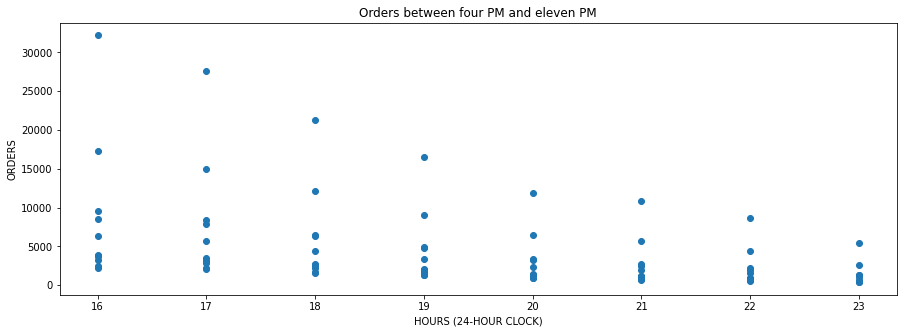

In [229]:
orders1623_x = all_orders_long[(all_orders_long['hours'].apply(lambda x: int(x)) > 15) &
                              (all_orders_long['hours'].apply(lambda x: int(x)) < 24)]['hours']
orders1623_y = all_orders_long[(all_orders_long['hours'].apply(lambda x: int(x)) > 15) &
                              (all_orders_long['hours'].apply(lambda x: int(x)) < 24)]['total orders']

plt.figure(figsize=(15,5))
plt.scatter(orders1623_x, orders1623_y)
plt.title("Orders between four PM and eleven PM")
plt.xlabel("HOURS (24-HOUR CLOCK)")
plt.ylabel("ORDERS")
plt.show()

#### ORDERS BETWEEN 4PM AND 11PM

During this time period, we witness the eventual decline of orders, noting that some department orders fall faster than others.  I also note that the larger cluster of orders occur below the 10,000 mark.

Threshold:  10,000 orders or less

In [230]:
orders411_lesstenk = all_orders_long[(all_orders_long['total orders'].apply(lambda x: int(x)) <= 10000) &
                                     (all_orders_long['hours'].apply(lambda x: int(x)) > 15) & 
                                     (all_orders_long['hours'].apply(lambda x: int(x)) < 24)]
orders411_lesstenk

display(all_orders_long[(all_orders_long['hours'].apply(lambda x: int(x)) > 15) &
                       (all_orders_long['hours'].apply(lambda x: int(x)) < 24)].
       groupby('department')['total orders'].agg('sum').reset_index())
display(all_orders_long[(all_orders_long['hours'].apply(lambda x: int(x)) > 15) &
                       (all_orders_long['hours'].apply(lambda x: int(x)) < 24)].
       groupby('hours')['total orders'].agg('sum').reset_index())

,department,total orders
0,bakery,16032
1,breakfast,9853
2,canned goods,15335
3,dairy eggs,72504
4,deli,15065
5,dry goods pasta,13261
6,frozen,36457
7,meat seafood,10171
8,pantry,26799
9,produce,134416


,hours,total orders
0,16,93369
1,17,81444
2,18,63916
3,19,48673
4,20,34319
5,21,29572
6,22,23280
7,23,14425


At our present threshold, all but two departments have received orders at every hour; dairy eggs and produce.  The number of hours displayed below has been specially adjusted for this table alone; a department displaying '8' hours indicates there has been orders received for every hour in this period.

In [231]:
grouped_orders411_hours = orders411_lesstenk.groupby('department')['hours'].agg('count').reset_index()
grouped_orders411_hours

,department,hours
0,bakery,8
1,breakfast,8
2,canned goods,8
3,dairy eggs,5
4,deli,8
5,dry goods pasta,8
6,frozen,8
7,meat seafood,8
8,pantry,8
9,produce,2


At our present threshold, dairy egg orders were received only between 7 and 11PM.

In [232]:
orders411_lesstenk[orders411_lesstenk['department'] == 'dairy eggs']

,department,hours,total orders
212,dairy eggs,19,9082
223,dairy eggs,20,6482
234,dairy eggs,21,5714
245,dairy eggs,22,4349
256,dairy eggs,23,2534


At our present threshold, produce orders were received only between 10 and 11PM.

In [233]:
orders411_lesstenk[orders411_lesstenk['department'] == 'produce']

,department,hours,total orders
251,produce,22,8698
262,produce,23,5406


At our present threshold, the most number of orders were received by the snacks and frozen departments.  The
least number of orders were received by the breakfast and meat seafood departments.

In [234]:
grouped_orders411_orders = orders411_lesstenk.groupby('department')['total orders'].agg('sum').reset_index()
grouped_orders411_orders

,department,total orders
0,bakery,16032
1,breakfast,9853
2,canned goods,15335
3,dairy eggs,28161
4,deli,15065
5,dry goods pasta,13261
6,frozen,36457
7,meat seafood,10171
8,pantry,26799
9,produce,14104


Threshold:  Greater than 10,000 orders

We only have orders received by two departments; dairy eggs and produce.

In [235]:
orders411_greatertenk = all_orders_long[(all_orders_long['total orders'].apply(lambda x: int(x)) > 10000) &
                                        (all_orders_long['hours'].apply(lambda x: int(x)) > 15) & 
                                        (all_orders_long['hours'].apply(lambda x: int(x)) < 24)]
orders411_greatertenk

,department,hours,total orders
179,dairy eggs,16,17292
185,produce,16,32200
190,dairy eggs,17,14976
196,produce,17,27582
201,dairy eggs,18,12075
207,produce,18,21247
218,produce,19,16522
229,produce,20,11879
240,produce,21,10882


At our present threshold, the produce department had received orders at every hour except 10 and 11PM.

In [236]:
orders411_greatertenk[orders411_greatertenk['department'] == 'produce']

,department,hours,total orders
185,produce,16,32200
196,produce,17,27582
207,produce,18,21247
218,produce,19,16522
229,produce,20,11879
240,produce,21,10882


At our present threshold, the dairy eggs department had only received orders between 4 and 6PM.

In [237]:
orders411_greatertenk[orders411_greatertenk['department'] == 'dairy eggs']

,department,hours,total orders
179,dairy eggs,16,17292
190,dairy eggs,17,14976
201,dairy eggs,18,12075


The second largest number of orders from produce and dairy eggs occur during this time period at our present threshold.

In [239]:
grouped_orders411_greater = orders411_greatertenk.groupby('department')['total orders'].agg('sum').reset_index()
grouped_orders411_greater

,department,total orders
0,dairy eggs,44343
1,produce,120312


#### MIDNIGHT TO SIX AM

32,018 total orders

Beginning at midnight, large orders (2500+) for dairy eggs are received and begin a decline until 4AM before seeing another large resurgence of orders up to 6AM.  Produce orders also follows this same pattern but with less orders.

Orders from produce and dairy eggs were by far the most ordered items during this time period.  The smallest number of orders came from the breakfast and meat seafood departments.  Dairy eggs and produce seem to be the food of choice during these hours although there are steady orders coming from every department at every hour but in smaller batches (1000 or less).

most ordered:  produce & dairy eggs, 17,255 / 32,018 = 54%

second most ordered:  snacks & frozen,  5,972 / 32,018 = 19%

least ordered:  meat seafood and breakfast,  1,684 / 32,018 = 5%

all other orders:  bakery, canned goods, deli, dry goods pasta, & pantry,  7,107 / 32,018 = 22%

#### SEVEN AM TO THREE PM

745,466 total orders

We begin to see a huge surge in orders moving from the hundreds and thousands to tens of thousands of orders per hour.  We reach our peak number of orders at 2PM with nearly 101,000 orders total.  Orders for produce and dairy eggs continue to dominate in this time period.

Orders for produce begin strong at a rate above 10,000+ orders and continue to climb until they reach a plateau beginning at 11AM.  After 12PM, the orders begin to increase again until they reach their peak at 2PM.  This pattern is consistent across every hour with some department orders deviating only slightly.

Most of the departments seem to cluster at a volume of 10,000 orders or less, showing us a steady stream of orders throughout this time period.  Orders for produce and dairy eggs largely deviate beginning at 8AM and continues this pattern throughout this time period.

most ordered:  produce & dairy eggs,  403,441 / 745,466 = 54%

second most ordered:  snacks & frozen,  137,754 / 745,466 = 19%

least ordered:  breakfast & meat seafood,  38,152 / 745,466 = 5%

all other orders:  bakery, canned goods, deli, dry goods pasta, & pantry,  166,119 / 745,466 = 22%

During this time period, we see 713,448 more orders received compared to the midnight to 6AM observation.

#### FOUR PM TO ELEVEN PM

388,998 total orders

In our final time period, we witness the eventual decline of orders noting that some departments see much larger declines than others.

The largest drop in orders occurs between 5 and 6PM, showing a decline of 17,528 orders within the hour.

Compared to the previous time period, we see about half of the number of orders received, 388998 / 745466 = 52%.

most ordered:  produce & dairy eggs,  206,920 / 388,998 = 53%

second most ordered:  snacks & frozen,  75,562 / 388,998 = 19%

least ordered:  breakfast & meat seafood,  20,024 / 388,998 = 5%

all other orders:  bakery, canned goods, deli, dry goods pasta, & pantry,  86,492 / 388,998 = 22%

There is a common pattern shown across the three time periods I have analyzed and they are nearly identical.  The majority of total orders from each time period was dominated by produce and dairy eggs, accounting for over 50% of the total orders.  

The next most ordered food items were from the snacks and frozen department and this was found consistently in each time period we observed, accounting for about 19% of the total orders.  

The least ordered foods came from the breakfast and meat seafood departments, accounting for 5% of the total orders and this was found across all three time periods we have observed.  

All other department orders were grouped together and their total orders were added up which accounted for about 22% of the total orders; this was also found to be consistent across all three time periods.

#### RESULTS

The question at hand is if people order different foods at different times of the day.  According to my analysis, I would have to say that answer is no.  

For every hour in this data set, beginning at midnight and ending at 11PM, every department has received orders.  There isn't one hour where a department does not receive an order.  There is a consistent pattern showing that people are placing the same kinds of orders from every department across the 24-hour timeline.  

Every hour, specific departments are receiving orders in the same manner; most from produce and dairy eggs, second most from frozen and snacks department, least from breakfast and meat seafood, and all other departments are receiving orders in the same manner across the three time periods.

#### TAKEAWAY

This was a surprising result to come across because I assumed the answer was an obvious yes.  But what I instead found in this data set was a pattern which tells me that the ordering habits of human beings using Instacart are actually very consistent and can be measured and analyzed.  This information could be useful for grocery store owners and other business owners who are looking to sell food products now knowing what people are buying in a consistent manner.

I do have to remember that since I was not given more detailed information about the orders, it's very possible I dropped departments that may have contained food orders but did not have obvious names that were food-related.  I will also keep in mind that we are only looking at one season for one year and the ordering habits of the people on Instacart may change over time.  But it was a great exploration into the data and a fascinating look into the minds of perfect strangers who were simply looking to get their groceries delivered.